Dataset-Titanic

# **V. Aditya Bharadwaj**
# **2211CS010585**
# **Group-3**

**Introduction**
The Titanic dataset is one of the most well-known datasets used for data analysis and machine learning. It contains records of passengers who were aboard the RMS Titanic, which sank after hitting an iceberg in 1912. The dataset is primarily used for survival prediction, analyzing the factors that influenced survival rates, such as class, gender, age, and family relationships. By examining this dataset, we can gain insights into passenger demographics, travel patterns, and the impact of socio-economic status on survival.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings

In [6]:
warnings.filterwarnings("ignore")
td=pd.read_csv("train.csv")
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
td.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Column Description
1.PassengerId - Unique identifier for each passenger
2.Survived - Survival status (0 = No, 1 = Yes)
3.Pclass - Passenger class (1st, 2nd, or 3rd class)
4.Name - Full name of the passenger
5.Sex - Gender of the passenger (male or female)
6.Age - Age of the passenger
7.SibSp - Number of siblings or spouses aboard the Titanic
8.Parch - Number of parents or children aboard the Titanic
9.Ticket - Ticket number assigned to the passenger
10.Fare - Ticket fare paid by the passenger
11.Cabin - Cabin number assigned to the passenger (if available)
12.Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
td["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.4) 
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(26.3)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(44)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(34.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(32.16)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")


In [11]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

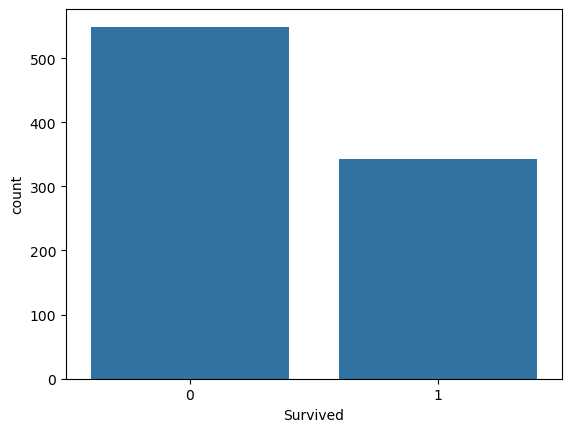

In [12]:
sns.countplot(x="Survived",data=td)

td["Age"].value_counts()

In [13]:
td["Survived"].isnull().sum()

0

# Data Visualizations

<Axes: xlabel='Pclass', ylabel='count'>

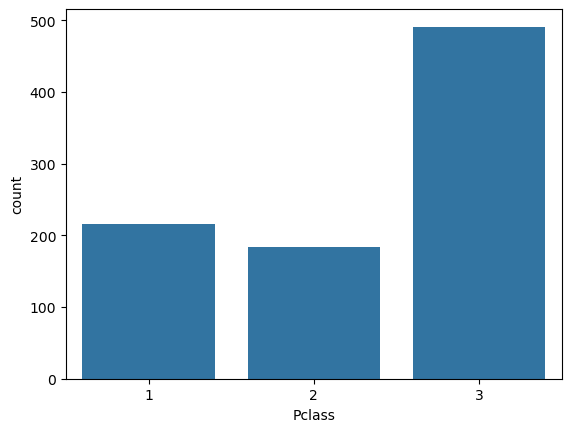

In [14]:
sns.countplot(x="Pclass", data=td)

<Axes: xlabel='Pclass', ylabel='count'>

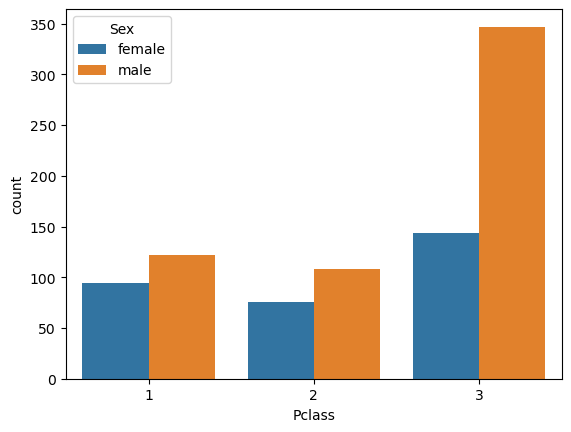

In [15]:
sns.countplot(x="Pclass", hue="Sex",data=td)

<Axes: xlabel='Survived', ylabel='count'>

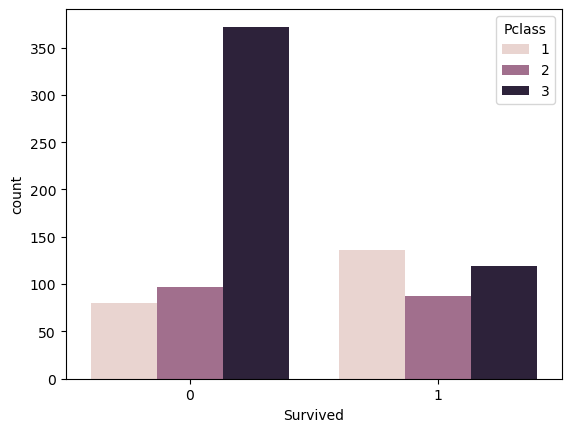

In [16]:
sns.countplot(x="Survived", hue="Pclass",data=td)

<Axes: xlabel='Survived', ylabel='count'>

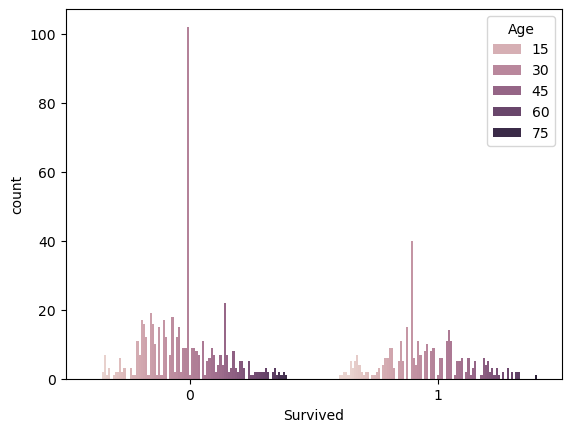

In [17]:
sns.countplot(x="Survived", hue="Age",data=td)

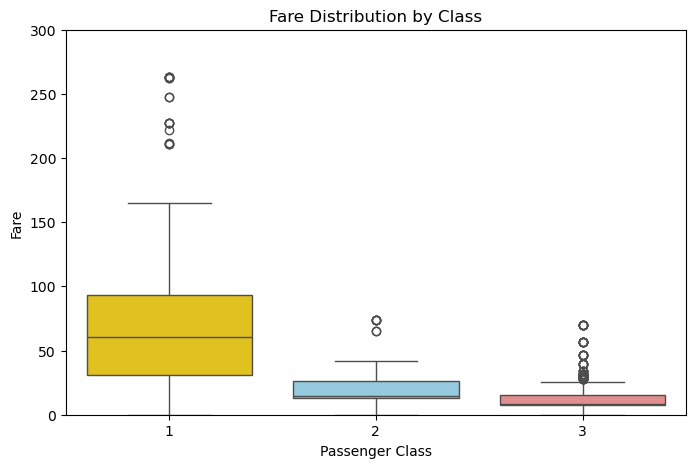

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=td, palette=['gold', 'skyblue', 'lightcoral'])
plt.title("Fare Distribution by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.ylim(0, 300)  
plt.show()

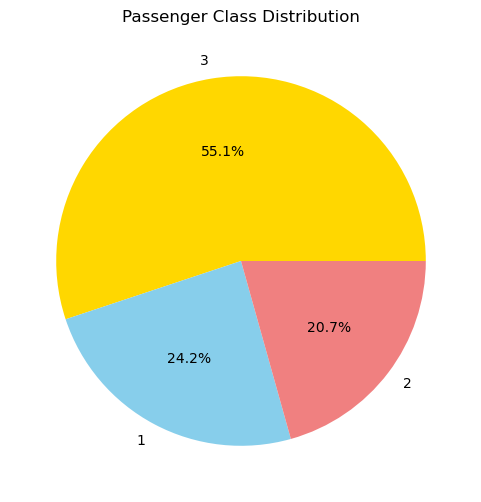

In [19]:
plt.figure(figsize=(6, 6))
td['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightcoral'])
plt.title("Passenger Class Distribution")
plt.ylabel("")
plt.show()

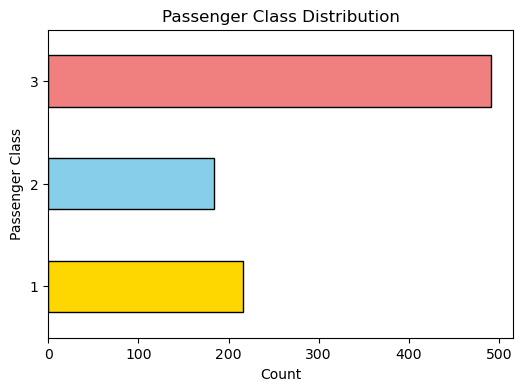

In [20]:
plt.figure(figsize=(6, 4))
td['Pclass'].value_counts().sort_index().plot(kind='barh', color=['gold', 'skyblue', 'lightcoral'], edgecolor='black')
plt.title("Passenger Class Distribution")
plt.xlabel("Count")
plt.ylabel("Passenger Class")
plt.show()

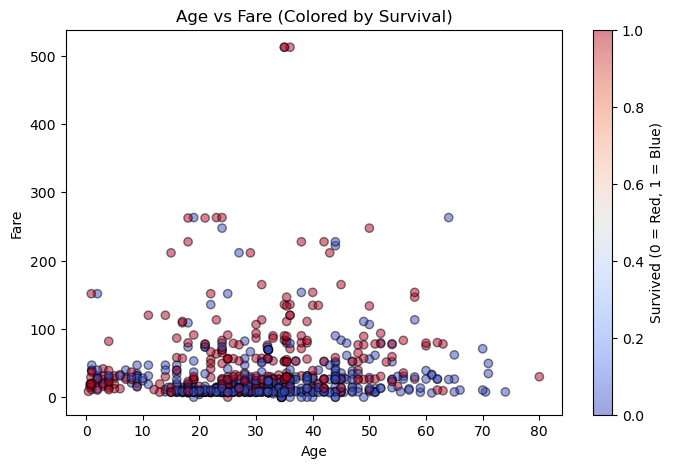

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(td['Age'], td['Fare'], alpha=0.5, c=td['Survived'], cmap='coolwarm', edgecolors='black')
plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label="Survived (0 = Red, 1 = Blue)")
plt.show()

In [22]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [24]:
td["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
td["Cabin"].value_counts()

Cabin
F       366
E121    115
D        97
E101     77
C124     23
       ... 
E34       1
C7        1
C54       1
E36       1
C148      1
Name: count, Length: 149, dtype: int64

In [26]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
td["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
td.dropna(inplace=True)

In [29]:
td["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [30]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
dtypes: bool(12)
memory usage: 17.4 KB


In [32]:
td['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [33]:
sex=pd.get_dummies(td['Sex'])
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [34]:
td['Cabin']

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object

In [50]:
ca=pd.get_dummies(td['Cabin'])
ca

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
td['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [52]:
emb=pd.get_dummies(td['Embarked'])
emb

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [53]:
td['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

In [54]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")
pcls

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
886,False,True,False
887,True,False,False
888,False,False,True
889,True,False,False


In [55]:
td.drop(["Pclass","Sex","Embarked","Cabin"],axis=1,inplace=True)

In [56]:
td=pd.concat([td,sex,emb,pcls,ca],axis=1)
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 164 entries, PassengerId to T
dtypes: bool(156), float64(2), int64(4), object(2)
memory usage: 197.9+ KB
None


In [57]:
td.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [58]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to T
dtypes: bool(156), float64(2), int64(3)
memory usage: 177.1 KB


In [59]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,F,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,22.0,1,0,7.2500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,35.0,1,0,53.1000,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [60]:
X=td.drop(["Survived"],axis=1)
X

,Age,SibSp,Parch,Fare,female,male,C,Q,S,Pclass_1,...,F,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,22.00,1,0,7.2500,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,38.00,1,0,71.2833,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,26.00,0,0,7.9250,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,35.00,1,0,53.1000,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,35.00,0,0,8.0500,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00,0,0,13.0000,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
887,19.00,0,0,30.0000,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
888,32.16,1,2,23.4500,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
889,26.00,0,0,30.0000,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        889 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [40]:
y=td["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

**Predictions using Linear regression**

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 121 to 37
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 136.1 KB


In [64]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 711 entries, 121 to 37
Series name: Survived
Non-Null Count  Dtype
--------------  -----
711 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [44]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 178 entries, 387 to 234
Series name: Survived
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 387 to 234
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  178 non-null    int64  
 1   Pclass       178 non-null    int64  
 2   Name         178 non-null    object 
 3   Sex          178 non-null    object 
 4   Age          178 non-null    float64
 5   SibSp        178 non-null    int64  
 6   Parch        178 non-null    int64  
 7   Ticket       178 non-null    object 
 8   Fare         178 non-null    float64
 9   Cabin        178 non-null    object 
 10  Embarked     178 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.7+ KB


In [65]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(max_iter=10000)
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [66]:
preddd=lm.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,preddd))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.96      0.97        73

    accuracy                           0.98       178
   macro avg       0.98      0.97      0.98       178
weighted avg       0.98      0.98      0.98       178



In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preddd))

[[104   1]
 [  3  70]]


In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preddd))

0.9775280898876404


In [69]:
preddd

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Conclusion
**Analysis of the Titanic dataset reveals that survival rates were highly influenced by factors such as class, gender, and age. Passengers in first class had a significantly higher chance of survival compared to those in second or third class. Women and children had a much better survival rate due to the "women and children first" evacuation policy. Additionally, passengers who embarked from different ports showed varying survival rates, possibly linked to socio-economic backgrounds. The dataset is widely used in machine learning to build predictive models that estimate the likelihood of survival based on these features.**